# **Welcome to my SpaceShip Titanic Competition Notebook**

It is a beginner friendly notebook to solve a Data Science Classification problem.

To to keep it simple I imported the libraries only where they are need rather than all at the beginning.

If you are a beginner looking to learn and improve your ML skills, then this notebook gives you a clear calrity how to get a good a score in Kaggle competitions.

This notebook has score of ~ 0.80.

If this is useful, please upvote this notebook.

Any if you have any queries than feel free to comment.


## Importing basic Libraries and Data Sets

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [3]:
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
submisssion = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")

## EDA

In [4]:
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [5]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [7]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [8]:
# Converting True to 1 and False to 0 of the below mentioned columns
col = ["CryoSleep","VIP"]

for i in col:
    train[i] = train[i].apply(lambda x:1 if x == True else 0)
    test[i] = test[i].apply(lambda x: 1 if x == True else 0)

In [9]:
test.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


In [10]:
# Similary on Transported
train.Transported=train.Transported.apply(lambda x: 1 if x == True else 0)

In [11]:
# Droping unnecessary columns i.e PassengerId and Name
df = train.drop(["PassengerId","Name"],axis="columns")
test_df = test.drop(["PassengerId","Name"],axis="columns")
df.head(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0


In [12]:
# Filling null values
col = ["HomePlanet","Destination"]

for i in col:
    fill_train = df[i].mode().iloc[0]
    fill_test = test_df[i].mode().iloc[0]
    df[i].fillna(fill_train,inplace=True)
    test_df[i].fillna(fill_test,inplace=True)
    

/tmp/ipykernel_18/1125110092.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(fill_train,inplace=True)
/tmp/ipykernel_18/1125110092.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

<Axes: ylabel='Frequency'>

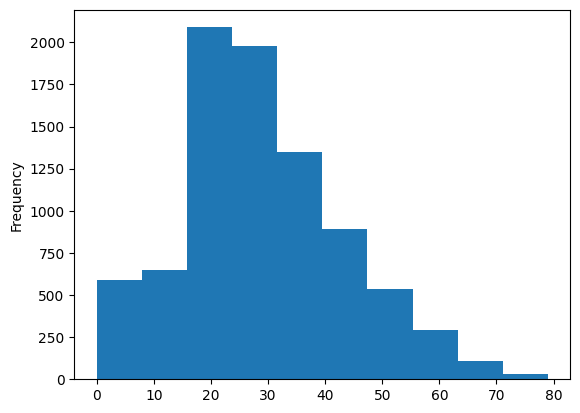

In [13]:
# Frequency of different age groups
df.Age.plot(kind="hist",bins=10)

In [14]:

cols=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Age']
for i in cols:
    fill_train=df[i].median()
    fill_test=df[i].median()
    df[i].fillna(fill_train,inplace=True)
    test_df[i].fillna(fill_test,inplace=True)

/tmp/ipykernel_18/110634020.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(fill_train,inplace=True)
/tmp/ipykernel_18/110634020.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method(

In [15]:
# Extracting extra data from Cabin column
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
test_df[['Deck', 'Num', 'Side']] = test_df['Cabin'].str.split('/', expand=True)


In [16]:
# Droping Cabin column as we extracted extra data from it, it is no longer useful
df.drop("Cabin",inplace=True,axis="columns")
test_df.drop("Cabin",inplace=True,axis="columns")

In [17]:
df.Deck.value_counts()

Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [18]:
df.Side.value_counts()

Side
S    4288
P    4206
Name: count, dtype: int64

In [19]:
cols=["Deck","Side"]
for i in cols:
    df[i].fillna("N",inplace=True)
    test_df[i].fillna("N",inplace=True)

/tmp/ipykernel_18/3633420786.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna("N",inplace=True)
/tmp/ipykernel_18/3633420786.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col:

In [20]:
# Converting Categorical variables to numerical
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
cols= ['HomePlanet','Destination','Deck','Side']
for i in cols:
    df[i] = label_encoder.fit_transform(df[i])
    test_df[i] = label_encoder.transform(test_df[i])
   

In [21]:
df.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0,2
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,2


In [22]:
test_df.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,6,3,2
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,5,4,2
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,2,0,2


In [23]:
df['Num'].fillna(str(82),inplace=True)
test_df['Num'].fillna(str(4),inplace=True)

/tmp/ipykernel_18/919999527.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Num'].fillna(str(82),inplace=True)
/tmp/ipykernel_18/919999527.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

In [24]:
df.dtypes

HomePlanet        int64
CryoSleep         int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
Deck              int64
Num              object
Side              int64
dtype: object

In [25]:
# Comverting Num column to int data type
df["Num"] = df["Num"].apply(lambda x: int(x))
test_df["Num"] = test_df["Num"].apply(lambda x: int(x))


In [26]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Num']
for i in cols:
    df[i] = scaler.fit_transform(df[[i]])
    test_df[i] = scaler.transform(test_df[[i]])
    

In [27]:
df.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1,0,2,0.493671,0,0.000000,0.000000,0.000000,0.00000,0.000000,0,1,0.0,1
1,0,0,2,0.303797,0,0.007608,0.000302,0.001064,0.02450,0.001823,1,5,0.0,2
2,1,0,2,0.734177,1,0.003001,0.119948,0.000000,0.29967,0.002030,0,0,0.0,2


In [28]:
test_df.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0,1,2,0.341772,0,0.0,0.000000,0.0,0.000000,0.0,6,0.001584,2
1,0,0,2,0.240506,0,0.0,0.000302,0.0,0.125982,0.0,5,0.002112,2
2,1,1,0,0.392405,0,0.0,0.000000,0.0,0.000000,0.0,2,0.000000,2


## Preparing Data for model training 

In [29]:
X = df.drop("Transported",axis="columns")
Y = df["Transported"]

In [30]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=42)


## Basic Model building

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svm = SVC()
svm.fit(xtrain,ytrain)
svm_p = svm.predict(xtest)
print(classification_report(svm_p,ytest))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      1589
           1       0.62      0.81      0.70      1019

    accuracy                           0.73      2608
   macro avg       0.73      0.75      0.73      2608
weighted avg       0.76      0.73      0.74      2608



In [32]:
from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier(random_state=42, verbose=0)
rand.fit(xtrain,ytrain)
rand_p = rand.predict(xtest)
print(classification_report(rand_p,ytest))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1337
           1       0.78      0.81      0.80      1271

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [33]:
from sklearn.ensemble import AdaBoostClassifier

ada=  AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ada_p = ada.predict(xtest)
print(classification_report(ada_p,ytest))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1162
           1       0.83      0.76      0.79      1446

    accuracy                           0.78      2608
   macro avg       0.78      0.79      0.78      2608
weighted avg       0.79      0.78      0.78      2608



In [34]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(xtrain,ytrain)
lgbm_p = lgbm.predict(xtest)
print(classification_report(lgbm_p,ytest))

[LightGBM] [Info] Number of positive: 3059, number of negative: 3026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1630
[LightGBM] [Info] Number of data points in the train set: 6085, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502712 -> initscore=0.010846
[LightGBM] [Info] Start training from score 0.010846
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1231
           1       0.82      0.79      0.81      1377

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [35]:
from xgboost import XGBClassifier

xgb = XGBClassifier(verbosity=0)
xgb.fit(xtrain,ytrain)
xgb_p = xgb.predict(xtest)
print(classification_report(xgb_p,ytest))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1291
           1       0.80      0.80      0.80      1317

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [36]:
from sklearn.naive_bayes import MultinomialNB

navies = MultinomialNB()
navies.fit(xtrain,ytrain)
navies_p=navies.predict(xtest)
print(classification_report(navies_p,ytest))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75      1477
           1       0.66      0.77      0.71      1131

    accuracy                           0.73      2608
   macro avg       0.73      0.73      0.73      2608
weighted avg       0.74      0.73      0.73      2608



In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lr_p=lr.predict(xtest)
print(classification_report(lr_p,ytest))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1425
           1       0.70      0.78      0.74      1183

    accuracy                           0.75      2608
   macro avg       0.75      0.76      0.75      2608
weighted avg       0.76      0.75      0.75      2608



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
knn_p=knn.predict(xtest)
print(classification_report(knn_p,ytest))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75      1378
           1       0.71      0.76      0.74      1230

    accuracy                           0.74      2608
   macro avg       0.74      0.74      0.74      2608
weighted avg       0.74      0.74      0.74      2608



# Hyperparameter Tuning

In [39]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [40]:
    """param_grid = {
        'C': [0.01,100, 10,],
        'gamma': [0.01,100, 10],
        'kernel': ['rbf', 'linear']
    }

    svm_grid = GridSearchCV(SVC(),param_grid=param_grid,cv=3)
    svm_grid.fit(xtrain,ytrain)
    print(svm_grid.best_params_)
    svm_best = svm_grid.best_estimator_
    accuracy_score(svm_best.predict(xtest),ytest)"""

"param_grid = {\n    'C': [0.01,100, 10,],\n    'gamma': [0.01,100, 10],\n    'kernel': ['rbf', 'linear']\n}\n\nsvm_grid = GridSearchCV(SVC(),param_grid=param_grid,cv=3)\nsvm_grid.fit(xtrain,ytrain)\nprint(svm_grid.best_params_)\nsvm_best = svm_grid.best_estimator_\naccuracy_score(svm_best.predict(xtest),ytest)"

In [41]:
svm = SVC(C=100, gamma= 0.01,kernel='linear')
svm.fit(X,Y)
svm_p = svm.predict(xtest)
print(classification_report(svm_p,ytest))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1247
           1       0.80      0.77      0.78      1361

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



In [42]:
accuracy_score(svm.predict(xtest),ytest)

0.7783742331288344

In [43]:
"""ada_param = {
    'n_estimators':[100,1000,500,1500],
    'learning_rate':[0.01,0.1,1,10]
}
ada_grid = GridSearchCV(AdaBoostClassifier(),param_grid=ada_param,cv=2)
ada_grid.fit(xtrain,ytrain)
print(ada_grid.best_params_)
ada_Best = ada_grid.best_estimator_
accuracy_score(ada_Best.predict(xtest),ytest)"""

"ada_param = {\n    'n_estimators':[100,1000,500,1500],\n    'learning_rate':[0.01,0.1,1,10]\n}\nada_grid = GridSearchCV(AdaBoostClassifier(),param_grid=ada_param,cv=2)\nada_grid.fit(xtrain,ytrain)\nprint(ada_grid.best_params_)\nada_Best = ada_grid.best_estimator_\naccuracy_score(ada_Best.predict(xtest),ytest)"

In [44]:
ada=  AdaBoostClassifier(learning_rate=0.1, n_estimators= 500)
ada.fit(X,Y)
ada_p = ada.predict(xtest)
print(classification_report(ada_p,ytest))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1190
           1       0.83      0.78      0.80      1418

    accuracy                           0.79      2608
   macro avg       0.79      0.80      0.79      2608
weighted avg       0.80      0.79      0.79      2608



In [45]:
accuracy_score(ada.predict(xtest),ytest)

0.7933282208588958

In [46]:
"""rand_param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2']
}

rand_grid = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rand_param, cv=5, n_iter=20, random_state=42)
rand_grid.fit(xtrain,ytrain)
print(rand_grid.best_params_)
rand_Best = rand_grid.best_estimator_
accuracy_score(rand_Best.predict(xtest),ytest)"""

"rand_param = {\n    'n_estimators': [100, 200, 300],\n    'max_depth': [None, 10, 20],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'max_features': [ 'sqrt', 'log2']\n}\n\nrand_grid = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rand_param, cv=5, n_iter=20, random_state=42)\nrand_grid.fit(xtrain,ytrain)\nprint(rand_grid.best_params_)\nrand_Best = rand_grid.best_estimator_\naccuracy_score(rand_Best.predict(xtest),ytest)"

In [47]:
rand = RandomForestClassifier(n_estimators= 100,min_samples_split=10, 
                              min_samples_leaf= 4,max_features="sqrt",max_depth= None)
rand.fit(X,Y)
rand_p = rand.predict(xtest)
print(classification_report(rand_p,ytest))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1305
           1       0.89      0.90      0.89      1303

    accuracy                           0.89      2608
   macro avg       0.89      0.89      0.89      2608
weighted avg       0.89      0.89      0.89      2608



In [48]:
accuracy_score(rand.predict(xtest),ytest)

0.8918711656441718

In [49]:
"""xgb_param = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'gamma': [0, 0.1, 0.2]
}


xgb_grid = RandomizedSearchCV(XGBClassifier(), param_distributions=xgb_param, cv=5, n_iter=50, random_state=42)
xgb_grid.fit(xtrain,ytrain)
print(xgb_grid.best_params_)
xgb_Best = xgb_grid.best_estimator_
accuracy_score(xgb_Best.predict(xtest),ytest)
"""

"xgb_param = {\n    'learning_rate': [0.01, 0.1, 0.3],\n    'max_depth': [3, 5, 7],\n    'min_child_weight': [1, 3, 5],\n    'subsample': [0.5, 0.7, 0.9],\n    'colsample_bytree': [0.5, 0.7, 0.9],\n    'gamma': [0, 0.1, 0.2]\n}\n\n\nxgb_grid = RandomizedSearchCV(XGBClassifier(), param_distributions=xgb_param, cv=5, n_iter=50, random_state=42)\nxgb_grid.fit(xtrain,ytrain)\nprint(xgb_grid.best_params_)\nxgb_Best = xgb_grid.best_estimator_\naccuracy_score(xgb_Best.predict(xtest),ytest)\n"

In [50]:
xgb = XGBClassifier(subsample= 0.7, min_child_weight= 1,max_depth =5,
                    learning_rate= 0.1, gamma= 0.1, colsample_bytree=0.5)
xgb.fit(X,Y)
xgb_p = xgb.predict(xtest)
print(classification_report(xgb_p,ytest))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1216
           1       0.86      0.81      0.84      1392

    accuracy                           0.83      2608
   macro avg       0.83      0.83      0.83      2608
weighted avg       0.83      0.83      0.83      2608



In [51]:
accuracy_score(xgb.predict(xtest),ytest)

0.8293711656441718

In [52]:
"""lgbm_param = {
    'num_leaves': [20, 30, 40],
   'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
   'min_child_samples': [20, 30, 40],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}


lgbm_grid = RandomizedSearchCV(LGBMClassifier(), param_distributions=lgbm_param, cv=5, n_iter=50, random_state=42)
lgbm_grid.fit(xtrain,ytrain)"""

"lgbm_param = {\n    'num_leaves': [20, 30, 40],\n   'learning_rate': [0.01, 0.1, 0.3],\n    'max_depth': [3, 5, 7],\n   'min_child_samples': [20, 30, 40],\n    'subsample': [0.6, 0.8, 1.0],\n    'colsample_bytree': [0.6, 0.8, 1.0],\n    'reg_alpha': [0, 0.1, 0.5],\n    'reg_lambda': [0, 0.1, 0.5]\n}\n\n\nlgbm_grid = RandomizedSearchCV(LGBMClassifier(), param_distributions=lgbm_param, cv=5, n_iter=50, random_state=42)\nlgbm_grid.fit(xtrain,ytrain)"

In [53]:
#lgbm_grid.best_params_


In [54]:

lgbm_best = LGBMClassifier(subsample= 0.6, reg_lambda= 0.1, reg_alpha= 0.1,
                           num_leaves= 20, min_child_samples= 20, max_depth=5,
                           learning_rate= 0.1, colsample_bytree= 0.8)
lgbm_best.fit(X,Y)
accuracy_score(lgbm_best.predict(xtest),ytest)

[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1631
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

0.8305214723926381

In [55]:
accuracy_score(xgb.predict(xtest),ytest)

0.8293711656441718

## Voting classifier

In [56]:
from sklearn.ensemble import VotingClassifier

In [57]:
voting = VotingClassifier(estimators=[('svm_best',svm),
                                      ('rand_Best',rand),('xgb_Best',xgb),
                                     ("lgbm_best",lgbm_best)]
                         , weights=[3,4,1,2], voting='hard')
voting.fit(X,Y)

[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1631
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

VotingClassifier(estimators=[('svm_best',
                              SVC(C=100, gamma=0.01, kernel='linear')),
                             ('rand_Best',
                              RandomForestClassifier(min_samples_leaf=4,
                                                     min_samples_split=10)),
                             ('xgb_Best',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.5, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorica...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgbm_best',
                              LGBMClassifier(colsample_bytree=0.8, max_depth=5,
                                             num_leaves=20, reg_alpha=0.1,
                                             reg_lambda=0.1, subsample=0.6))],
                 weights=[3, 4, 1, 2])

In [58]:
accuracy_score(voting.predict(xtest),ytest)

0.8477760736196319

In [59]:
print(classification_report(voting.predict(xtest),ytest))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1252
           1       0.86      0.84      0.85      1356

    accuracy                           0.85      2608
   macro avg       0.85      0.85      0.85      2608
weighted avg       0.85      0.85      0.85      2608



## Predicting Test Data for Submission

In [60]:
predictions = voting.predict(test_df)
submisssion["Transported"] = predictions
submisssion.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [61]:
submisssion.Transported=submisssion.Transported.apply(lambda x: True if x==1 else False)
submisssion.Transported

0        True
1       False
2        True
3        True
4        True
        ...  
4272     True
4273    False
4274     True
4275     True
4276     True
Name: Transported, Length: 4277, dtype: bool

In [62]:
submisssion.to_csv("submission.csv",index=False)